# Task 1

---

## Web Scraping and Analysis

In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [59]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [60]:
df = pd.DataFrame()
df["Reviews"] = reviews
df.head()

,Reviews
0,✅ Trip Verified | London Heathrow to Gibralta...
1,✅ Trip Verified | First time flying British Ai...
2,Not Verified | I flew London to Cairo and ret...
3,Not Verified | Absolutely the worst experienc...
4,Not Verified | Flew back from Malta after sc...


In [61]:
df.to_csv("ba_task_reviews.csv")

---
### Cleaning Data

In [62]:
import re

def clean(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df['Cleaned Data Reviews'] = df['Reviews'].apply(clean)
df.head()

,Reviews,Cleaned Data Reviews
0,✅ Trip Verified | London Heathrow to Gibralta...,Trip Verified London Heathrow to Gibraltar on...
1,✅ Trip Verified | First time flying British Ai...,Trip Verified First time flying British Airwa...
2,Not Verified | I flew London to Cairo and ret...,Not Verified I flew London to Cairo and return...
3,Not Verified | Absolutely the worst experienc...,Not Verified Absolutely the worst experience e...
4,Not Verified | Flew back from Malta after sc...,Not Verified Flew back from Malta after scatte...


---
### Tokenize

In [30]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [40]:
import nltk
nltk.download('punkt')
from nltk.tokenize import wordpunct_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

postag_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'X':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
   
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            pos = tag[0]  
            pos_full = postag_dict.get(pos) 
            if pos_full:
                newlist.append((word, pos_full))

    return newlist 

df['POS Tags'] = df['Cleaned Data Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Reviews,Cleaned Data Reviews,POS Tags
0,✅ Trip Verified | London Heathrow to Gibralta...,Trip Verified London Heathrow to Gibraltar on...,"[(Trip, n), (Verified, n), (London, n), (Heath..."
1,✅ Trip Verified | First time flying British Ai...,Trip Verified First time flying British Airwa...,"[(Trip, n), (Verified, n), (First, n), (time, ..."
2,Not Verified | I flew London to Cairo and ret...,Not Verified I flew London to Cairo and return...,"[(Verified, n), (flew, v), (London, n), (Cairo..."
3,Not Verified | Absolutely the worst experienc...,Not Verified Absolutely the worst experience e...,"[(Verified, n), (worst, a), (experience, n), (..."
4,Not Verified | Flew back from Malta after sc...,Not Verified Flew back from Malta after scatte...,"[(Verified, n), (Flew, n), (Malta, n), (scatte..."


---
### Lemmatization

In [64]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemmatized_text = " "
    
    for word, pos in pos_data:
        if not pos:
            lemma = word
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            
        lemmatized_text = lemmatized_text + " " + lemma

    return lemmatized_text

df['Lemmatized'] = df['POS Tags'].apply(lemmatize)
df.head()

,Reviews,Cleaned Data Reviews,POS Tags,Lemmatized
0,✅ Trip Verified | London Heathrow to Gibralta...,Trip Verified London Heathrow to Gibraltar on...,"[(Trip, n), (Verified, n), (London, n), (Heath...",Trip Verified London Heathrow Gibraltar th O...
1,✅ Trip Verified | First time flying British Ai...,Trip Verified First time flying British Airwa...,"[(Trip, n), (Verified, n), (First, n), (time, ...",Trip Verified First time fly British Airways...
2,Not Verified | I flew London to Cairo and ret...,Not Verified I flew London to Cairo and return...,"[(Verified, n), (flew, v), (London, n), (Cairo...",Verified fly London Cairo return October goo...
3,Not Verified | Absolutely the worst experienc...,Not Verified Absolutely the worst experience e...,"[(Verified, n), (worst, a), (experience, n), (...",Verified bad experience Flew Heathrow proble...
4,Not Verified | Flew back from Malta after sc...,Not Verified Flew back from Malta after scatte...,"[(Verified, n), (Flew, n), (Malta, n), (scatte...",Verified Flew Malta scatter son ash favourit...


In [67]:
df[['Reviews','Lemmatized']]

,Reviews,Lemmatized
0,✅ Trip Verified | London Heathrow to Gibralta...,Trip Verified London Heathrow Gibraltar th O...
1,✅ Trip Verified | First time flying British Ai...,Trip Verified First time fly British Airways...
2,Not Verified | I flew London to Cairo and ret...,Verified fly London Cairo return October goo...
3,Not Verified | Absolutely the worst experienc...,Verified bad experience Flew Heathrow proble...
4,Not Verified | Flew back from Malta after sc...,Verified Flew Malta scatter son ash favourit...
...,...,...
995,✅ Trip Verified | London to Athens. We were f...,Trip Verified London Athens fortunate get ex...
996,✅ Trip Verified | London to Johannesburg. So ...,Trip Verified London Johannesburg impressed ...
997,✅ Trip Verified | Newark to Bangalore return ...,Trip Verified Newark Bangalore return London...
998,✅ Trip Verified | London to Berlin scheduled ...,Trip Verified London Berlin schedule st Dece...


In [68]:
!pip install vaderSentiment

In [69]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyze = SentimentIntensityAnalyzer()

def vsa(review):
    sentiment_scores = analyze.polarity_scores(review)
    return sentiment_scores['compound']

df['Sentiment Score'] = df['Lemmatized'].apply(vsa)

def interpret_sentiment(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment Analysis'] = df['Sentiment Score'].apply(interpret_sentiment)
df.head()

,Reviews,Cleaned Data Reviews,POS Tags,Lemmatized,Sentiment Score,Sentiment Analysis
0,✅ Trip Verified | London Heathrow to Gibralta...,Trip Verified London Heathrow to Gibraltar on...,"[(Trip, n), (Verified, n), (London, n), (Heath...",Trip Verified London Heathrow Gibraltar th O...,0.8074,Positive
1,✅ Trip Verified | First time flying British Ai...,Trip Verified First time flying British Airwa...,"[(Trip, n), (Verified, n), (First, n), (time, ...",Trip Verified First time fly British Airways...,0.9382,Positive
2,Not Verified | I flew London to Cairo and ret...,Not Verified I flew London to Cairo and return...,"[(Verified, n), (flew, v), (London, n), (Cairo...",Verified fly London Cairo return October goo...,0.9453,Positive
3,Not Verified | Absolutely the worst experienc...,Not Verified Absolutely the worst experience e...,"[(Verified, n), (worst, a), (experience, n), (...",Verified bad experience Flew Heathrow proble...,-0.9816,Negative
4,Not Verified | Flew back from Malta after sc...,Not Verified Flew back from Malta after scatte...,"[(Verified, n), (Flew, n), (Malta, n), (scatte...",Verified Flew Malta scatter son ash favourit...,0.9349,Positive


In [74]:
vsa_counts = df['Sentiment Analysis'].value_counts()
vsa_counts

Positive    459
Negative    441
Neutral     100
Name: Sentiment Analysis, dtype: int64

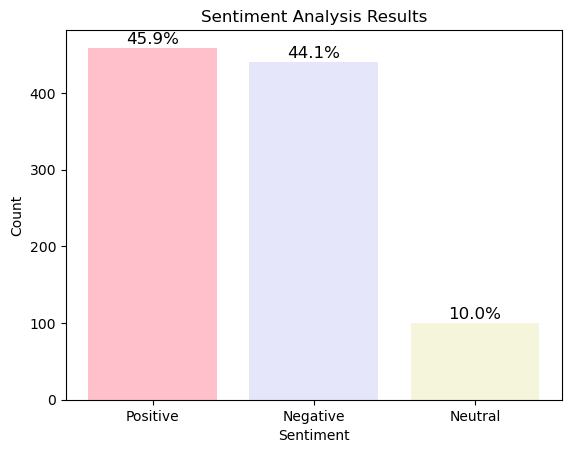

In [81]:
import matplotlib.pyplot as plt

vsa_counts = df['Sentiment Analysis'].value_counts()

sentiments = vsa_counts.index
counts = vsa_counts.values

total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

plt.bar(sentiments, counts, color=['pink', 'lavender', 'beige'])

plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Results")

for i, percentage in enumerate(percentages):
    plt.text(i, counts[i] + 1, f"{percentage:.1f}%", ha='center', va='bottom', fontsize=12)

plt.show()

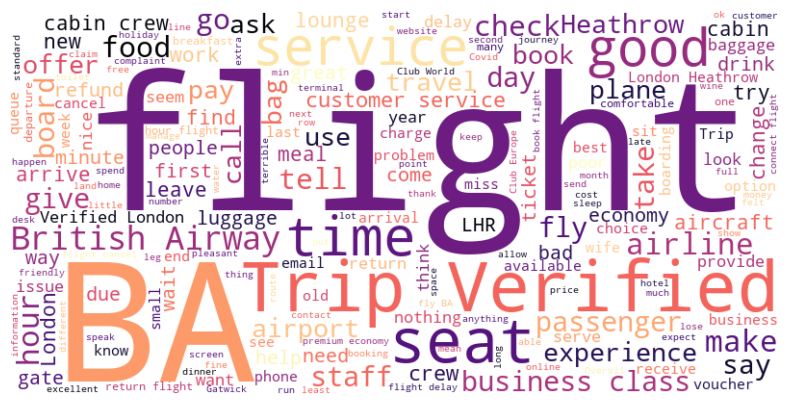

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Lemmatized'])

wordcloud = WordCloud(width=800, height=400, colormap='magma_r', background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()